<a href="https://colab.research.google.com/github/HP3-16/Uber_Demand_Supply_Gap/blob/main/Uber_Demand_Supply_Gap_HaridasP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uber Demand Supply Gap**

### **Importing necessary modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
!wget https://raw.githubusercontent.com/dittakaviram/Data-Science/master/Uber%20Supply%20Demand%20Gap/Uber%20Request%20Data.csv

--2022-10-27 16:48:11--  https://raw.githubusercontent.com/dittakaviram/Data-Science/master/Uber%20Supply%20Demand%20Gap/Uber%20Request%20Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395061 (386K) [text/plain]
Saving to: ‘Uber Request Data.csv.1’

Uber Request Data.c 100%[===================>] 385.80K  --.-KB/s    in 0.04s   

2022-10-27 16:48:11 (10.8 MB/s) - ‘Uber Request Data.csv.1’ saved [395061/395061]



### **Importing the dataset**

In [ ]:
uber_df = pd.read_csv("Uber Request Data.csv")
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


### **Preprocessing the data**

In [ ]:
#Changing all time stamps to a single format for ease of readability
uber_df["Request timestamp"] = uber_df["Request timestamp"].astype(str)
uber_df["Drop timestamp"] = uber_df["Drop timestamp"].astype(str)
uber_df["Request timestamp"] = uber_df["Request timestamp"].str.replace("/","-")
uber_df["Drop timestamp"] = uber_df["Drop timestamp"].str.replace("/","-")
uber_df["Request timestamp"] = pd.to_datetime(uber_df["Request timestamp"],dayfirst=True)
uber_df["Drop timestamp"] = pd.to_datetime(uber_df["Drop timestamp"],dayfirst=True)

In [ ]:
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [ ]:
uber_df.isnull().sum()
#indicates that 2650 Driver ids are null and 3914 of Drop time stamps are null

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [ ]:
#np.isnan(uber_df["Driver id"])
uber_df[np.isnan(uber_df["Driver id"])]
#indicates that if the driver id is NaN the status is that no cars are available.

#converting the NaN driver ids to 0 to work with better
uber_df["Driver id"] = uber_df["Driver id"].replace(np.nan,0)
uber_df["Driver id"] = uber_df["Driver id"].astype(int)
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,NaT


In [ ]:
 #np.isnat(uber_df["Drop timestamp"])
# uber_df[np.isnat(uber_df["Drop timestamp"])]

#since the trips are cancelled or cars aren't avaiable, it doesn't add up to our observations
uber_df = uber_df.drop(["Drop timestamp"],axis = 1)
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16
...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39


**Modifying the dataset for observation and visualization purposes.**

In [ ]:
uber_df["Req hour"] = uber_df["Request timestamp"].apply(lambda x:x.hour)
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Req hour
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,23
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,23
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,23
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,23


In [ ]:
#function for time of the day
def time_of_the_day(hr):
  if hr>=4 and hr<6:
    return "Early Morning"
  elif hr>=6 and hr<12:
    return "Morning"
  elif hr>=12 and hr<16:
    return "Afternoon"
  elif hr>=16 and hr<20:
    return "Evening"
  elif hr>=20:
    return "Night"
  elif hr>=0 and hr<4:
    return "Late Night"
uber_df["Time of the day"] = uber_df["Req hour"].apply(time_of_the_day)

In [ ]:
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Req hour,Time of the day
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning
...,...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,23,Night
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,23,Night
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,23,Night
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,23,Night


In [ ]:
uber_df["Day of the week"] = uber_df["Request timestamp"].dt.day_name()

In [ ]:
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Req hour,Time of the day,Day of the week
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday
...,...,...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,23,Night,Friday
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,23,Night,Friday
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,23,Night,Friday
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,23,Night,Friday


## **Visualization**

### **Univariate Analysis**

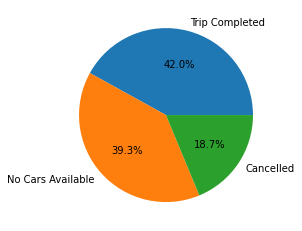

In [ ]:
uber_df.loc[(uber_df.Status =="Trip Completed"),'TC'] =1
uber_df.loc[(uber_df.Status =="No Cars Available"),'NC'] =1
uber_df.loc[(uber_df.Status =="Cancelled"),'X'] =1


markers = ['Trip Completed', 'No Cars Available', 'Cancelled']
sizes = [uber_df['TC'].value_counts()[1],
         uber_df['NC'].value_counts()[1],
         uber_df['X'].value_counts()[1],
         ]
plt.pie(sizes, labels=markers, autopct='%1.1f%%')
plt.show()

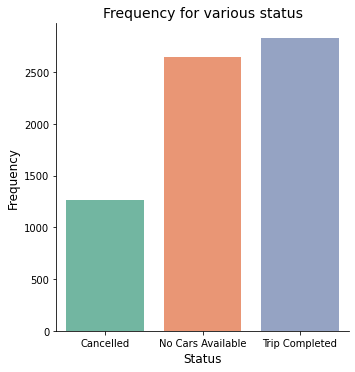

In [ ]:
#Plot between Status of cab and Frequency


status_list = ['Cancelled', 'No Cars Available', 'Trip Completed']

sns.catplot(data=uber_df, x="Status", kind="count",palette="Set2", order=status_list);

plt.title('Frequency for various status', fontsize = 14)
plt.xlabel("Status", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()
#order_status

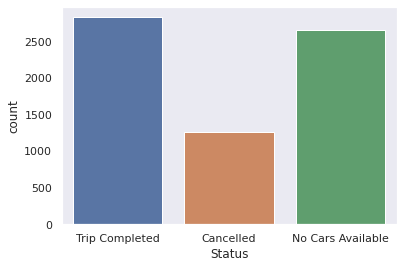

In [ ]:
#Plot between Status of cab and Frequency

sns.set(style="dark")
sns.countplot(x="Status", data=uber_df)
plt.show()

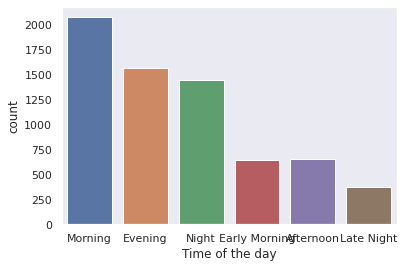

In [ ]:
#Plot between requests made during various times of a day and Frequency


sns.set(style="dark")
sns.countplot(x="Time of the day", data=uber_df)
plt.show()

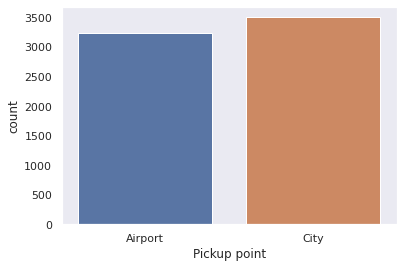

In [ ]:
#Plot between Status of requests from Pickup points and Frequency

sns.set(style="dark")
sns.countplot(x="Pickup point", data=uber_df)
plt.show()

### **Bivariate analysis**

In [ ]:
uber_df.groupby(['Status','Day of the week']).size()

Status             Day of the week
Cancelled          Friday             240
                   Monday             262
                   Thursday           252
                   Tuesday            240
                   Wednesday          270
No Cars Available  Friday             580
                   Monday             504
                   Thursday           571
                   Tuesday            505
                   Wednesday          490
Trip Completed     Friday             561
                   Monday             601
                   Thursday           530
                   Tuesday            562
                   Wednesday          577
dtype: int64

In [ ]:
uber_df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Req hour,Time of the day,Day of the week,TC,NC,X
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN


In [ ]:
uber_df.groupby(["Status","Pickup point"]).describe()

Request id                                   \
                                    count         mean          std    min   
Status            Pickup point                                               
Cancelled         Airport           198.0  3290.095960  1843.572243  174.0   
                  City             1066.0  3093.461538  1914.715417   18.0   
No Cars Available Airport          1713.0  3630.946877  1931.203759    2.0   
                  City              937.0  3502.350053  1986.238388    4.0   
Trip Completed    Airport          1327.0  3253.578749  1970.929964    1.0   
                  City             1504.0  3365.257979  1954.810080   10.0   

                                                                Driver id  \
                                    25%     50%     75%     max     count   
Status            Pickup point                                              
Cancelled         Airport       1873.75  3340.0  4799.0  6608.0     198.0   
                  City          1572.75  3085.0  4528.5  6759.0    1066.0   
No Cars Available Airport       2202.00  3680.0  5187.0  6765.0    1713.0   
                  City          1740.00  3936.0  5441.0  6754.0     937.0   
Trip Completed    Airport       1572.00  3117.0  4956.0  6762.0    1327.0   
                  City          1681.50  3398.5  4941.0  6766.0    1504.0   

                                            ...   NC            X            \
                                      mean  ...  75%  max   count mean  std   
Status            Pickup point              ...                               
Cancelled         Airport       145.762626  ...  NaN  NaN   198.0  1.0  0.0   
                  City          153.309568  ...  NaN  NaN  1066.0  1.0  0.0   
No Cars Available Airport         0.000000  ...  1.0  1.0     0.0  NaN  NaN   
                  City            0.000000  ...  1.0  1.0     0.0  NaN  NaN   
Trip Completed    Airport       146.243406  ...  NaN  NaN     0.0  NaN  NaN   
                  City          150.168883  ...  NaN  NaN     0.0  NaN  NaN   

                                                         
                                min  25%  50%  75%  max  
Status            Pickup point                           
Cancelled         Airport       1.0  1.0  1.0  1.0  1.0  
                  City          1.0  1.0  1.0  1.0  1.0  
No Cars Available Airport       NaN  NaN  NaN  NaN  NaN  
                  City          NaN  NaN  NaN  NaN  NaN  
Trip Completed    Airport       NaN  NaN  NaN  NaN  NaN  
                  City          NaN  NaN  NaN  NaN  NaN  

[6 rows x 48 columns]

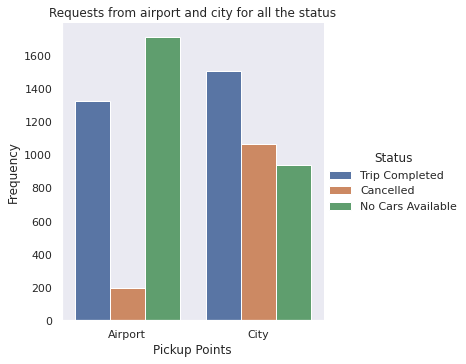

In [ ]:
sns.catplot(x="Pickup point", hue="Status", kind="count", data=uber_df);
plt.title('Requests from airport and city for all the status')
plt.xlabel("Pickup Points", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

The above plot tells that: 
1. Count of "No cars available" is very high in airports compared to cities.
2. Count of "Cancelled" is very high in cities compared to airports.
3. Count of "Trip Cancelled" is high by a small margins in cities compared to airports.


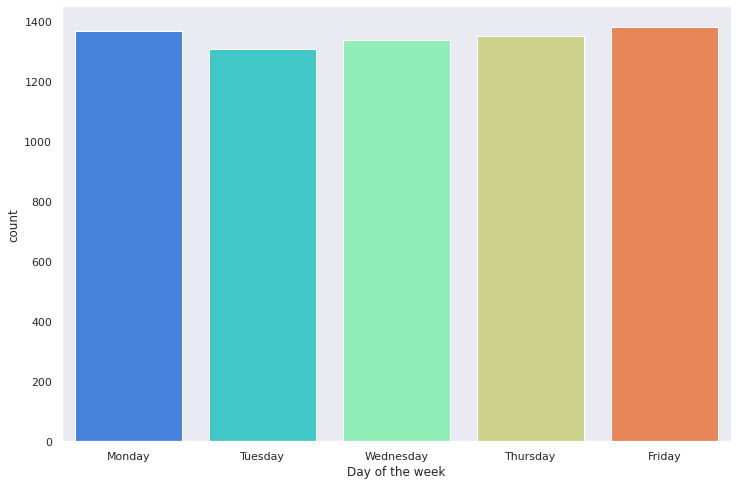

In [ ]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(data=uber_df, x='Day of the week', palette = "rainbow")
plt.show()

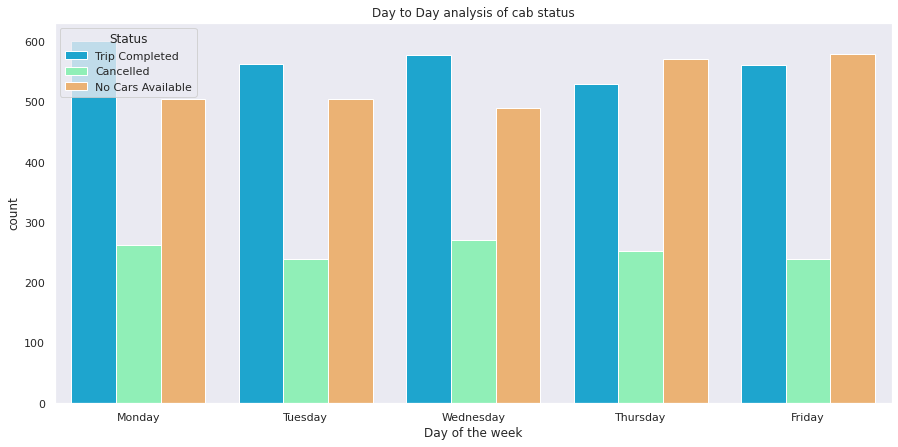

In [ ]:
plt.subplots(figsize=(15,7))
plt.title("Day to Day analysis of cab status")
sns.countplot(x="Day of the week",hue='Status',data=uber_df,palette='rainbow')
plt.show()

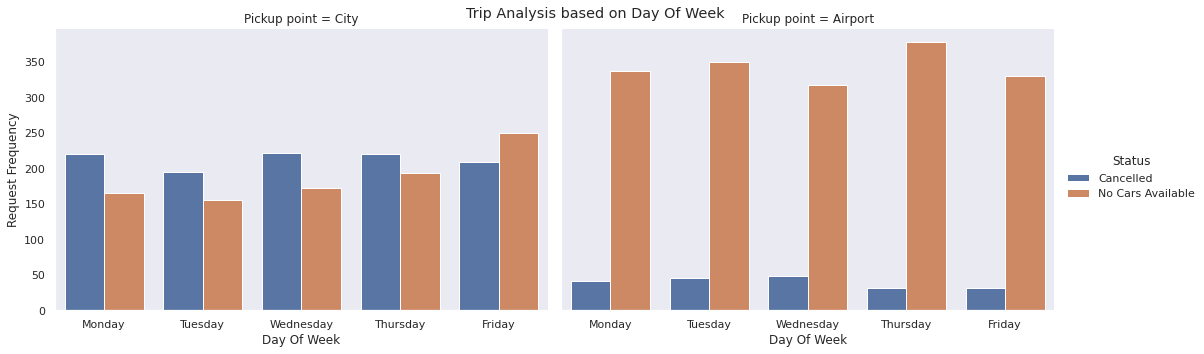

In [ ]:
days_list = ["Monday","Tuesday","Wednesday","Thursday","Friday"]

unavailable_cab_data = uber_df[(uber_df["Status"] == "Cancelled") | (uber_df["Status"] == "No Cars Available")]

plot = sns.catplot(x="Day of the week", col= "Pickup point", hue="Status", kind="count", data=unavailable_cab_data, aspect=1.5, order=days_list);

plot.fig.suptitle("Trip Analysis based on Day Of Week")
plot.set_xlabels("Day Of Week")
plot.set_ylabels("Request Frequency")
plt.show()

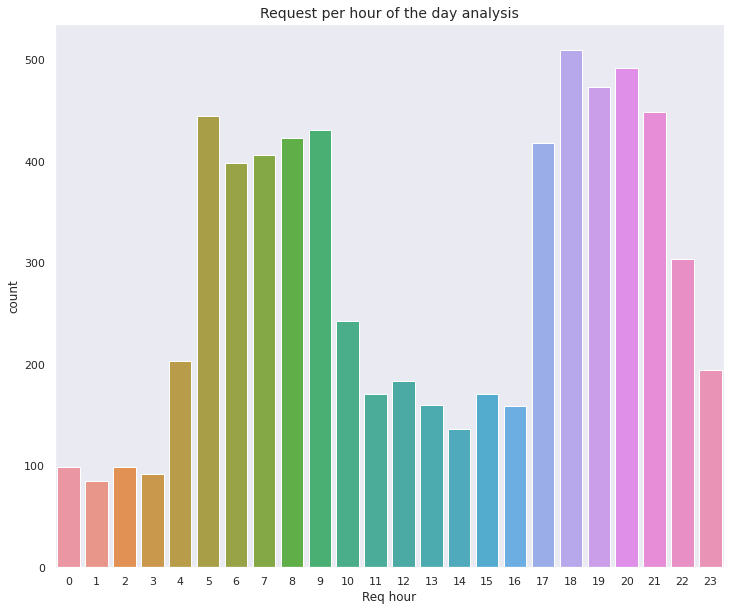

In [ ]:
plt.figure(figsize=(12,10))
plt.title("Request per hour of the day analysis",fontsize=14)
sns.countplot(x='Req hour', data=uber_df)
plt.show()

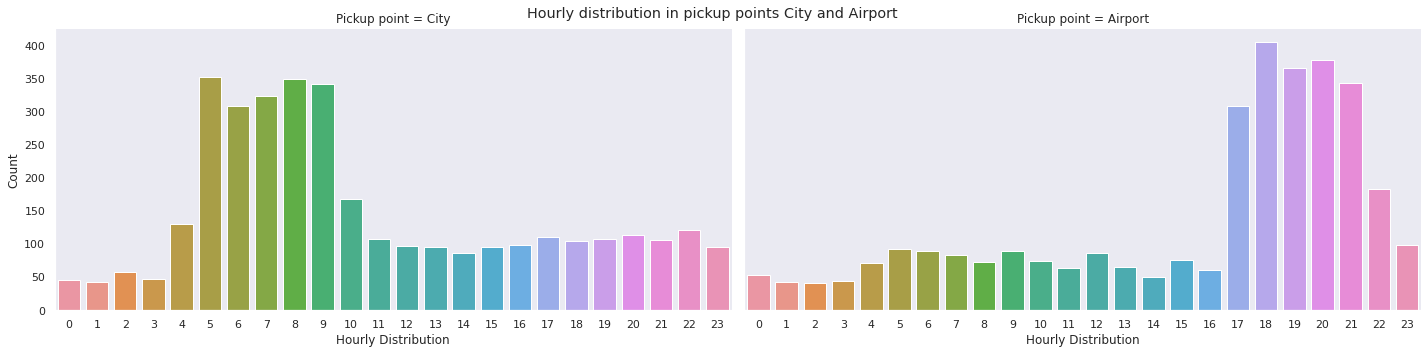

In [ ]:
pickup_list = ['City','Airport']
plot = sns.catplot(x="Req hour",col="Pickup point",kind="count",col_order = pickup_list,data=uber_df,aspect=2)
plot.fig.suptitle("Hourly distribution in pickup points City and Airport ")
plot.set_xlabels("Hourly Distribution")
plot.set_ylabels("Count")

plt.show()

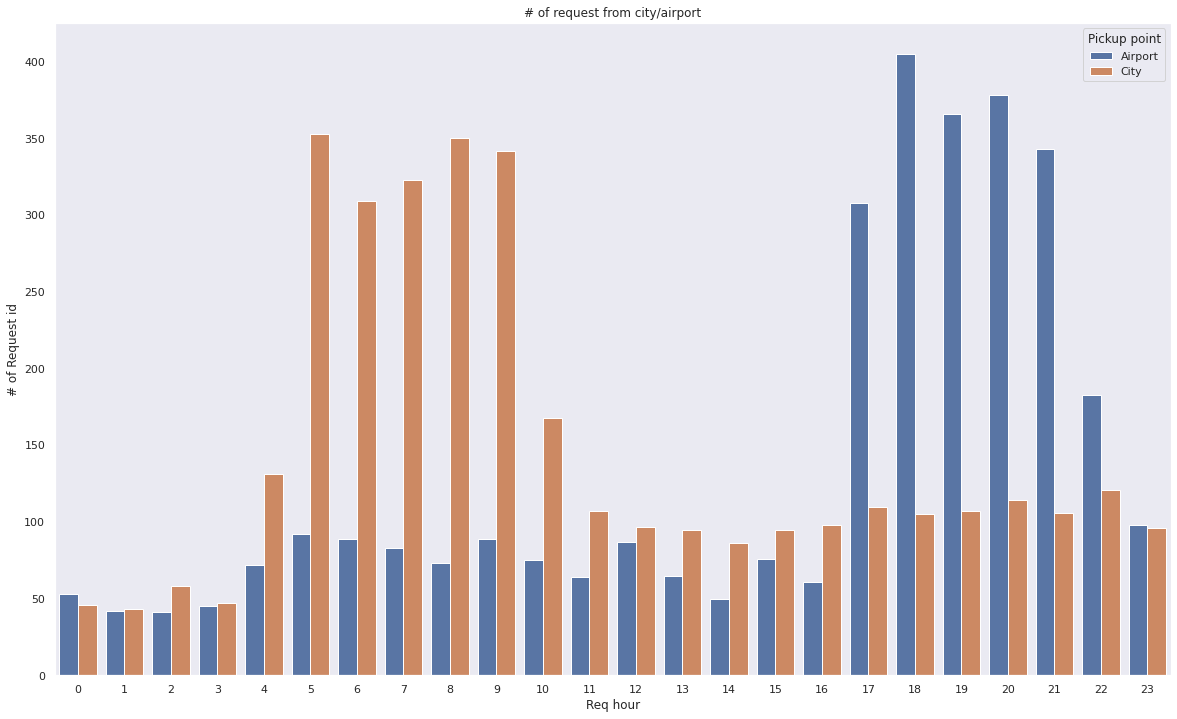

In [ ]:
# plt.figure(figsize=(20,12))
# sns.barplot(x='Req hour',y='Request id',hue='Status',data=uber_df,estimator = len)
# plt.title("no of requests per hour according to status")
# plt.ylabel("count of Request id")
# plt.show()

plt.figure(figsize=(20,12))
sns.barplot(x='Req hour', y='Request id', hue='Pickup point',data=uber_df, estimator=len)
plt.title("# of request from city/airport")
plt.ylabel("# of Request id")
plt.show()

TypeError: ignored

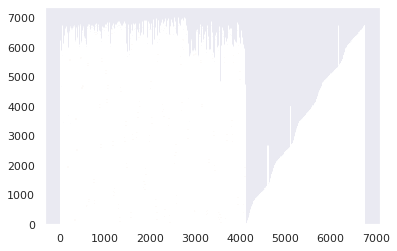

In [ ]:
uber_df.plot(kind='bar',stacked=True)
plt.title("# of request from city/airport")
plt.xlabel('Req hour')
plt.ylabel("# of Request id")
plt.plot()

The above plot clearly shows that :
1. People request cars from city in the morning more compared to the airports
2. People request cars from airports in the evening more compared to the city

In [ ]:
uber_df


,Request id,Pickup point,Driver id,Status,Request timestamp,Req hour,Time of the day,Day of the week,TC,NC,X
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,23,Night,Friday,NaN,1.0,NaN
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,23,Night,Friday,NaN,1.0,NaN
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,23,Night,Friday,NaN,1.0,NaN
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,23,Night,Friday,NaN,1.0,NaN


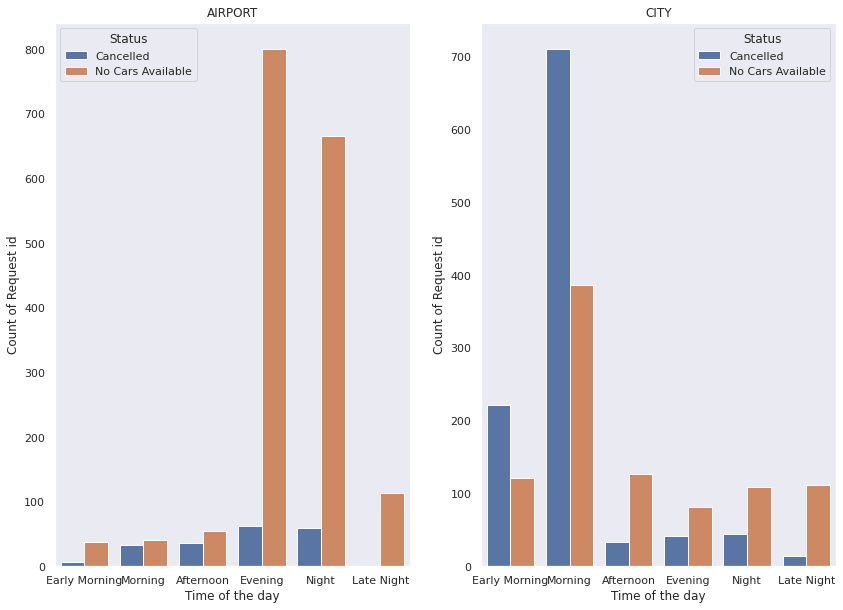

In [ ]:
time_slots_of_the_day = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(x='Time of the day',y='Request id',hue='Status',data=uber_df[(uber_df['Pickup point']=='Airport')&
(uber_df['Status']!='Trip Completed')],estimator=len,order = time_slots_of_the_day)
plt.title("AIRPORT")
plt.ylabel("Count of Request id")


plt.subplot(1,2,2)
sns.barplot(x='Time of the day',y='Request id',hue='Status',data=uber_df[(uber_df['Pickup point']=='City')&
(uber_df['Status']!='Trip Completed')],estimator=len, order = time_slots_of_the_day)
plt.title("CITY")
plt.ylabel("Count of Request id")
plt.show()

This plot also shows that:
1. In Evening and night, there are lesser availability of cars
2. In early morning, it's highly likely that the cab is cancelled.

<Figure size 1008x720 with 0 Axes>

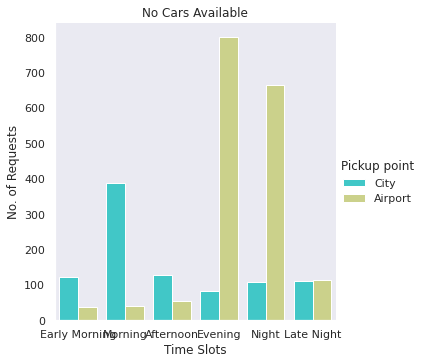

In [ ]:
#No cars available vs Pickup points and Cancelled vs Pickup points
no_cars_available = uber_df[(uber_df['Status'] == 'No Cars Available')]
plt.figure(figsize=(14,10))
sns.catplot(x="Time of the day", hue="Pickup point", kind="count", palette="rainbow", data=no_cars_available, order = time_slots_of_the_day)

plt.title('No Cars Available')
plt.ylabel('No. of Requests')
plt.xlabel('Time Slots')

plt.show()


<Figure size 1008x720 with 0 Axes>

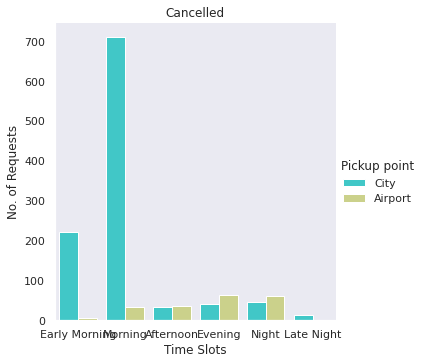

In [ ]:
cancelled_list = uber_df[(uber_df['Status'] == 'Cancelled')]
plt.figure(figsize=(14,10))
sns.catplot(x="Time of the day", hue="Pickup point", kind="count", palette="rainbow", data=cancelled_list, order = time_slots_of_the_day)

plt.title('Cancelled')
plt.ylabel('No. of Requests')
plt.xlabel('Time Slots')

plt.show()

In [ ]:
#demand -> all the available 
uber_df.loc[(uber_df.Status == 'Trip Completed') | (uber_df.Status == 'Cancelled')| (uber_df.Status == 'No Cars Available'), 'demand'] = 'Demand' 

In [ ]:
#supply -> only completed
uber_df.loc[(uber_df.Status == 'Trip Completed'), 'supply'] = 'Supply'

In [ ]:
uber_df.loc[(uber_df.Status == 'Cancelled')| (uber_df.Status == 'No Cars Available'), 'gap'] = 'Gap' 

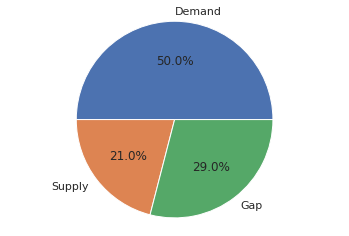

In [ ]:
uber_df.loc[(uber_df.Status == 'Trip Completed') | (uber_df.Status == 'Cancelled')| (uber_df.Status == 'No Cars Available'), 'demand'] =1
uber_df.loc[(uber_df.Status == 'Trip Completed'), 'supply']=1
uber_df.loc[(uber_df.Status == 'Cancelled')| (uber_df.Status == 'No Cars Available'), 'gap'] =1


labels = ['Demand', 'Supply', 'Gap']
sizes = [uber_df['demand'].value_counts()[1],
         uber_df['supply'].value_counts()[1],
         uber_df['gap'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
#adding supply_demand_gap column
def SDG(x):
    if x == 'Trip Completed':
        return 'Supply'
    else:       
        return 'Supply demand gap'
    
uber_df['Supply demand gap'] = uber_df['Status'].apply(SDG)
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Req hour,Time of the day,Day of the week,TC,NC,X,demand,supply,gap,Supply demand gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,1,1,NaN,Supply
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,1,1,NaN,Supply
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,1,1,NaN,Supply
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,1,1,NaN,Supply
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,1,1,NaN,Supply


### **Plotting demands**

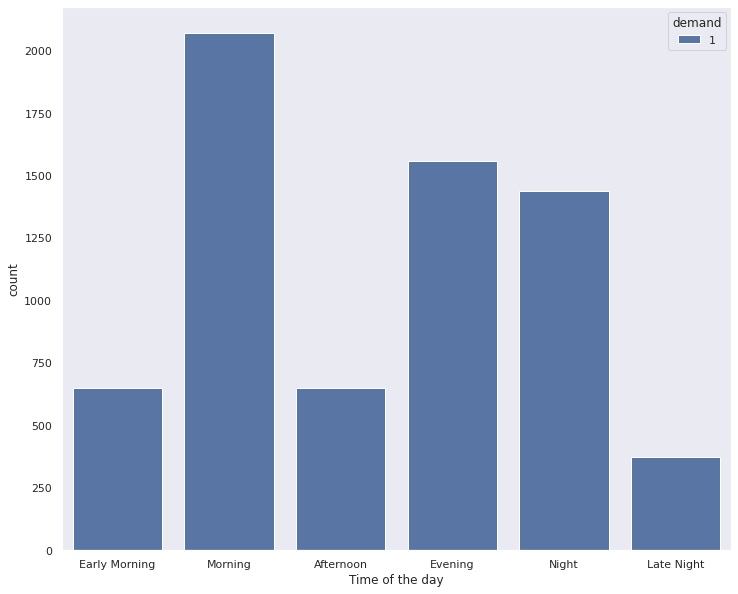

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(hue='demand',x="Time of the day", data=uber_df,order=time_slots_of_the_day)
plt.show()

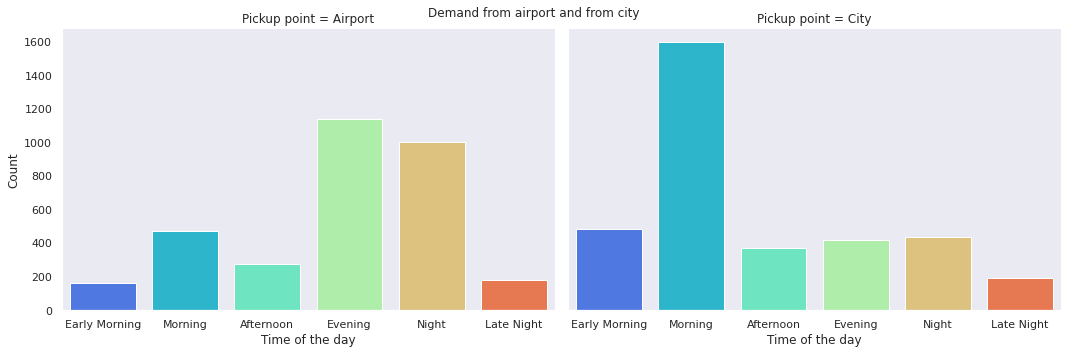

In [ ]:
plot = sns.catplot(x='Time of the day', col="Pickup point", kind="count", palette="rainbow", aspect = 1.5, 
          data=uber_df, order = time_slots_of_the_day)

plot.fig.suptitle('Demand from airport and from city', fontsize=12)
plot.set_xlabels('Time of the day', fontsize=12)
plot.set_ylabels('Count', fontsize=12)
plt.show()

From the above plot, it is visibly clear that:
1. demand is high during evening and night at airports
2. demand is high during Morning in city

### **Plotting gaps**

**Gaps visualization on various time slots**

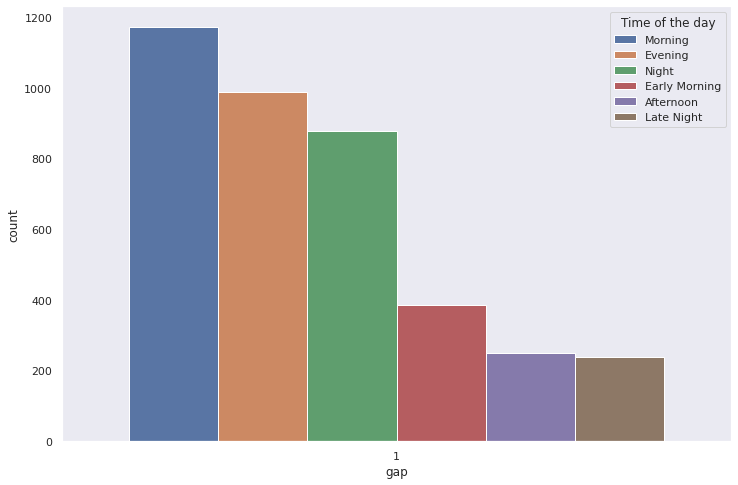

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='gap',hue="Time of the day", data=uber_df)
total = len(uber_df['gap'])
plt.show()


This plot indicates that the gap is highest during Morning, evening and night

**Gap visualization on various Pickup points**

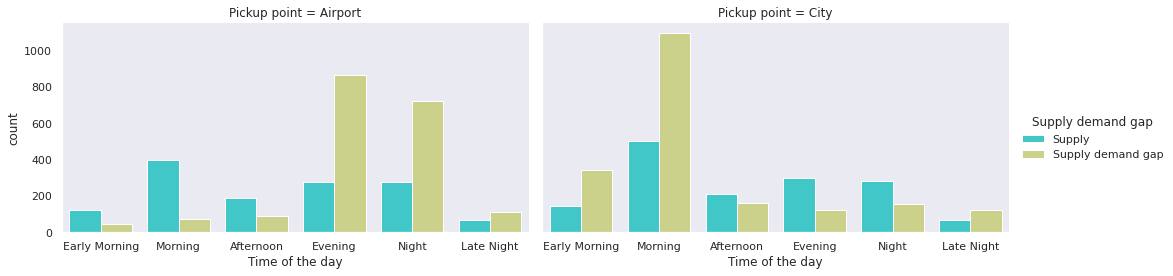

In [ ]:
sns.catplot(x="Time of the day", hue="Supply demand gap", col = 'Pickup point', data=uber_df, palette='rainbow', 
            kind="count", height=4, aspect = 1.8, order = time_slots_of_the_day);

plot.fig.suptitle('Supply Demand Gap')
plot.set_xlabels('Time of the day')
plot.set_ylabels('Frequency')
plt.show()

From the above plot, it is clearly obtained that:
1. The Demand supply gap at airports is more during evening and night
2. The Demand supply gap at city is more during morning.

### **Conclusion**

The status of the cabs -"Cancelled" and "No car available" is disastrous to the revenue department of the company.
It is observed from the supply demand gap, that 
1. "Cancelled" and "No car available" in airports is heavily observed during Evening and Night times.
2. "Cancelled" and "No car available" in city is heavily observed during Early morning and morning times.

As from the video in the introduction, it may be possible that more flights land in the airport in the Evening hours.

The reason for cancellation of cabs during the morning hours maybe due to the fact that, the driver may not get return trip as the flights at the morning hours may be sparse.

### **Possible suggestions to fill the supply demand gap**

1. Provide incentives to the drivers to take customers in non busy hours.
2. Facilitate more cabs from city to airports
3. Set a limit for cancellation per day. i.e, the driver can't cancel more than that limit.
4. Increase the waiting time charges for the interest of the drivers such that they never hesitite to drop and could possibly wait in case it needs waiting.